In [1]:
from loads import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images_all, labels_all = load_dataset()

Reading dataset/dataset.yaml... done!
Loading images.................... done!
Loaded 159 images in 3.426306962966919 seconds!


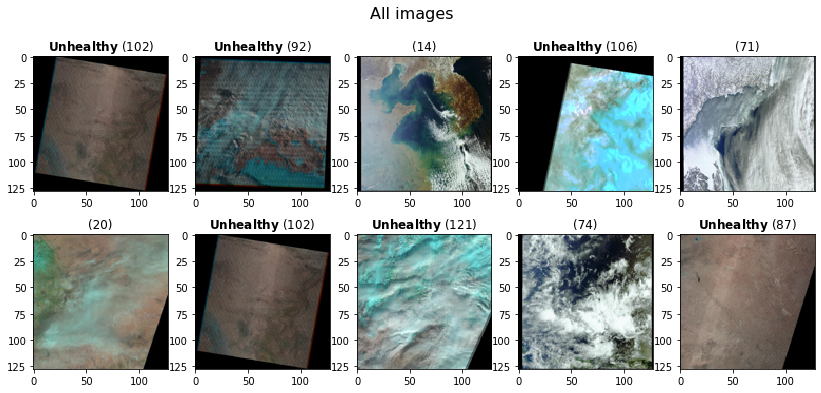

In [3]:
def visualize_labels(title, images, labels, seed=42):
    """Visualize a few images from our dataset!
    
    Args:
        title (str): Title of figure.
        images (np.ndarray): An array containing images. Shape should be (N, 64, 64, 3).
        labels (np.ndarray): An array of labels, 0 or 1. Shape should be (N, )
        seed (int): Seed used to generate random samples. Change this to see different samples!
    """
    # Validate inputs
    assert len(images.shape) == 4
    assert len(labels.shape) == 1
    assert labels.shape[0] == images.shape[0]
    assert images.shape[-1] == 3

    generator = np.random.RandomState(seed)
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for ax in axes.flatten():
        index = generator.randint(len(images))
        ax.imshow(images[index])
        if labels[index] == 0:
            ax.set_title(f"$\\bf{{Unhealthy}}$ ({index})")
        else:
            ax.set_title(f"({index})")
        
    fig.suptitle(title, fontsize=16)


# Visualize some labels
visualize_labels("All images", images_all, labels_all)

In [4]:
def extract_features(images):
    features = []
    for image in images:
        # Image shape should be (rows, cols, 3)
        rows, cols, channels = image.shape
        assert channels == 3

        # Get feature: average along row and column axes
        f = np.mean(image, axis=(0, 1))
        assert f.shape == (3,)
        features.append(f)
    return np.array(features)


features_all = extract_features(images_all)

In [5]:
import sklearn.model_selection


# Get train / validation sets
(
    images_train,
    images_validation,
    features_train,
    features_validation,
    labels_train,
    labels_validation,
) = sklearn.model_selection.train_test_split(
    images_all,
    features_all,
    labels_all,
    train_size=0.9,
    random_state=42,
    shuffle=True,
)

# Print shapes of train + validation features and labels
print("Train images shape:\t", images_train.shape)
print("Train features shape:\t", features_train.shape)
print("Train labels shape:\t", labels_train.shape)
print()
print("Validation images shape:\t", images_validation.shape)
print("Validation features shape:\t", features_validation.shape)
print("Validation labels shape:\t", labels_validation.shape)

Train images shape:	 (143, 128, 128, 3)
Train features shape:	 (143, 3)
Train labels shape:	 (143,)

Validation images shape:	 (16, 128, 128, 3)
Validation features shape:	 (16, 3)
Validation labels shape:	 (16,)


In [ ]:
#K NEAREST NEIGHBORS: ACCURACY 60% (40 images each)
#k nearest neighbors: accuracy 77.5% (80 images each)

import sklearn.neighbors

classifier = None

# ***** Start of your code *****
classifier = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=3
)
classifier.fit(features_train, labels_train)
# ***** End of your code *****


In [ ]:
#MLP CLASSIFIER: ACCURACY 40% (40 images each)
#MLP: Accuracy 43.75% (80 images)
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(features_train, labels_train)

In [6]:
#ONE CLASS SVM: ACCURACY 20% (40 images each)
#svm 37.5% (80 images each)
from sklearn.svm import OneClassSVM
classifier = OneClassSVM(gamma='auto').fit(features_train, labels_train)

In [ ]:
#don't need these 
#SGD Classifier: Accuracy 43.75% (80 images each)
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5).fit(features_train, labels_train)

In [7]:
labels_validation_predicted = classifier.predict(features_validation) # ***** Your code here *****

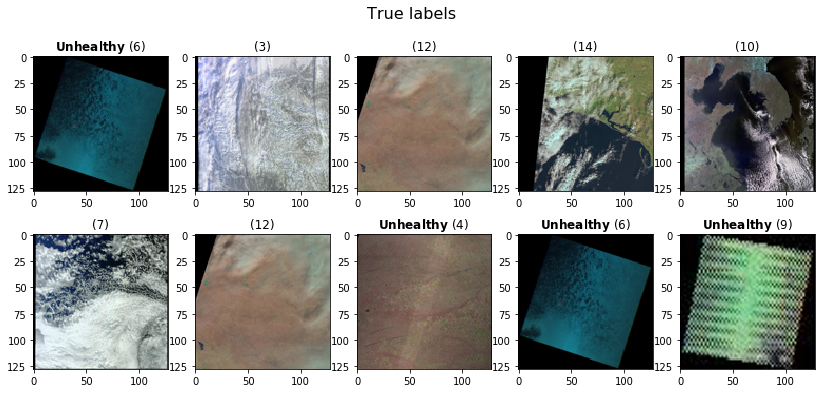

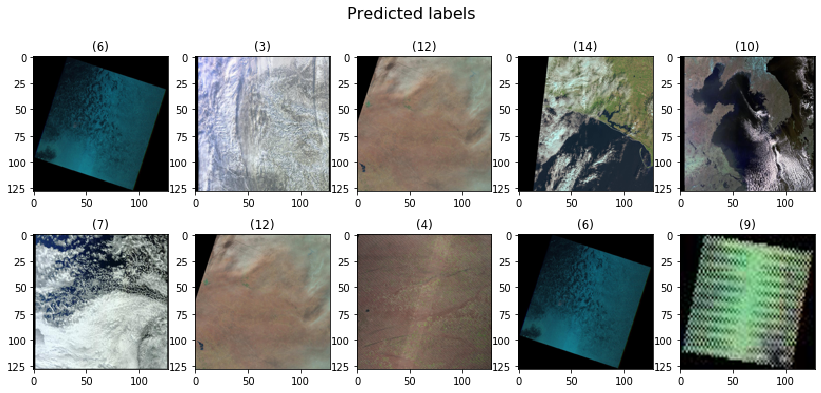

In [8]:
visualize_labels("True labels", images_validation, labels_validation)
visualize_labels(
    "Predicted labels", images_validation, labels_validation_predicted
)

In [9]:
accuracy = np.mean(labels_validation_predicted == labels_validation)
print(f"Accuracy: {accuracy}%")

Accuracy: 0.375%


In [10]:
# ***** Start of your code *****
sklearn.metrics.plot_confusion_matrix(
    classifier, features_validation, labels_validation
)
# ***** End of your code *****
plt.title("Confusion Matrix")
plt.show()

ValueError: plot_confusion_matrix only supports classifiers